In [5]:
# create model
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import keras
import keras_preprocessing
import time
from PIL import Image
from keras import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2,imagenet_utils
from keras.utils import to_categorical
from keras.layers import Dense,GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import Model,load_model
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.applications.mobilenet import preprocess_input
from IPython.display import Image
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import os
def getFilenames(directory:str)->list:
    pth=[]
    for dirpath,_,filenames in os.walk(directory):
        for f in filenames:
            pth.append(os.path.join(dirpath, f))
    return pth
    
path_beer_bottles="./archive/Bottle Images/Bottle Images/Beer Bottles"
path_plastic_bottles="./archive/Bottle Images/Bottle Images/Plastic Bottles"
path_soda_bottles="./archive/Bottle Images/Bottle Images/Soda Bottles"
path_water_bottles="./archive/Bottle Images/Bottle Images/Water Bottles"
path_wine_bottles="./archive/Bottle Images/Bottle Images/Wine Bottles"

beer_bottles_filesname=getFilenames(path_beer_bottles)
beer_bottles_filesname.sort()
targetb=[]

plastic_bottles_filesname=getFilenames(path_plastic_bottles)
plastic_bottles_filesname.sort()
targetp=[]

soda_bottles_filesname=getFilenames(path_soda_bottles)
soda_bottles_filesname.sort()
targets=[]

water_bottles_filesname=getFilenames(path_water_bottles)
water_bottles_filesname.sort()
targetwa=[]

wine_bottles_filesname=getFilenames(path_wine_bottles)
wine_bottles_filesname.sort()
targetwi=[]

for i in range(len(beer_bottles_filesname)):
    targetb.append('b')
for i in range(len(plastic_bottles_filesname)):
    targetp.append('p')
for i in range(len(soda_bottles_filesname)):
    targets.append('s')
for i in range(len(water_bottles_filesname)):
    targetwa.append('wa')
for i in range(len(wine_bottles_filesname)):
    targetwi.append('wi')

target=targetb+targetp+targets+targetwa+targetwi
all_names=beer_bottles_filesname+plastic_bottles_filesname+soda_bottles_filesname+water_bottles_filesname+wine_bottles_filesname

X_train,X_test,y_train,y_test=train_test_split(all_names, target, test_size=0.2, random_state=1,stratify=target)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=1,stratify=y_train)

df_train=pd.DataFrame(columns=['Images','target'])
df_validate=pd.DataFrame(columns=['Images','target'])
df_test=pd.DataFrame(columns=['Images','target'])

df_train['Images']=X_train
df_train['target']=y_train


df_validate['Images']=X_val
df_validate['target']=y_val


df_test['Images']=X_test
df_test['target']=y_test

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
        dataframe=df_train,
        x_col="Images",
        y_col="target",
        target_size=(220, 220),
        batch_size=32,color_mode='rgb',
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
        dataframe=df_validate,
        x_col="Images",
        y_col="target",
        target_size=(220, 220),
        batch_size=32,color_mode='rgb',
        class_mode='categorical')
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=False,
    vertical_flip=False)

test_generator = test_datagen.flow_from_dataframe(
        dataframe=df_test,
        x_col="Images",
        y_col="target",
        target_size=(220, 220),
        batch_size=32,color_mode='rgb',
        class_mode='categorical')
        
IMG_SHAPE = (220,220,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                                include_top=False,
                                                weights='./mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5')
# freeze the base model layers
base_model.trainable = False

# add custom classification layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# define training parameters
epochs = 3 # maximum number of epochs
model_checkpoint = ModelCheckpoint("best_model_rmap_v2.h5", save_best_only=True, verbose=1)

# train model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[model_checkpoint])
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# define training parameters
epochs = 3 # maximum number of epochs
model_checkpoint = ModelCheckpoint("best_model_rmap_v2.h5", save_best_only=True, verbose=1)

# train model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[model_checkpoint])

Found 16000 validated image filenames belonging to 5 classes.
Found 4000 validated image filenames belonging to 5 classes.
Found 5000 validated image filenames belonging to 5 classes.
Found 16000 validated image filenames belonging to 5 classes.
Found 4000 validated image filenames belonging to 5 classes.
Found 5000 validated image filenames belonging to 5 classes.
Epoch 1/3


2023-03-17 12:32:56.621662: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 49561600 exceeds 10% of free system memory.
2023-03-17 12:32:56.629549: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 49561600 exceeds 10% of free system memory.


500/500 [==============================] - ETA: 0s - loss: 0.0906 - accuracy: 0.9243
Epoch 1: val_loss improved from inf to 0.05815, saving model to best_model_rmap_v2.h5
500/500 [==============================] - 321s 638ms/step - loss: 0.0906 - accuracy: 0.9243 - val_loss: 0.0582 - val_accuracy: 0.9528
Epoch 2/3
500/500 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9663
Epoch 2: val_loss improved from 0.05815 to 0.04836, saving model to best_model_rmap_v2.h5
500/500 [==============================] - 290s 579ms/step - loss: 0.0414 - accuracy: 0.9663 - val_loss: 0.0484 - val_accuracy: 0.9535
Epoch 3/3
500/500 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9749
Epoch 3: val_loss improved from 0.04836 to 0.04166, saving model to best_model_rmap_v2.h5
500/500 [==============================] - 164s 328ms/step - loss: 0.0300 - accuracy: 0.9749 - val_loss: 0.0417 - val_accuracy: 0.9630
Epoch 1/3
500/500 [==============================] - E

/tmp/ipykernel_14846/704363277.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen = imagen.resize((220,220), Image.ANTIALIAS)


1/1 [==============================] - 0s 452ms/step
0


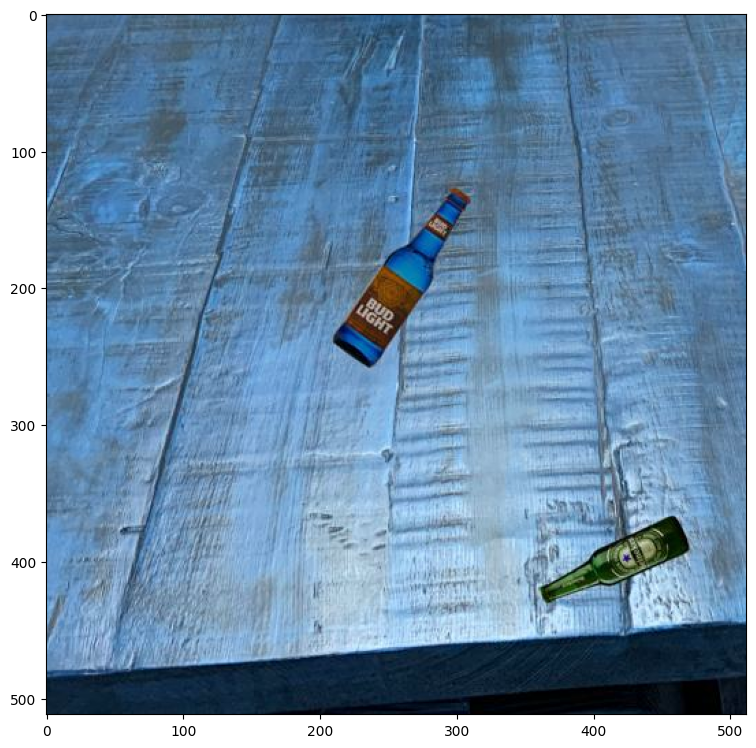

In [6]:
import time
import numpy as np
import cv2
import keras
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

# Define una función que carga el modelo y realiza una predicción en una imagen dada
def predecir_boton(path_imagen, modelo):
    # Cargar la imagen y redimensionarla
    imagen = Image.open(path_imagen)
    imagen = imagen.resize((220,220), Image.ANTIALIAS)
    
    # Convertir la imagen en un array NumPy y normalizarlo
    imagen_array = img_to_array(imagen) / 255
    
    # Realizar una predicción con el modelo
    prediccion = modelo.predict(imagen_array[None,:])
    clase_predicha = np.argmax(prediccion, axis=1)[0]
    
    # Devolver la clase predicha
    return clase_predicha

# Cargar el modelo
modelo = keras.models.load_model("best_model_rmap_v2.h5")

# Ruta de la imagen
path_imagen = './archive/Bottle Images/Bottle Images/Beer Bottles/00004986.jpg'

# Realizar la predicción y medir el tiempo de inferencia
start = time.process_time()
clase_predicha = predecir_boton(path_imagen, modelo)
tiempo_inferencia = time.process_time() - start

# Cargar la imagen en tamaño completo
imagen_completa = cv2.imread(path_imagen)

# Mostrar la imagen y la clase predicha
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imagen_completa)
print(clase_predicha)